In [670]:
!pip install pandas
!pip install opencv-python
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install pandas
!pip install opencv-python
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install seaborn

In [671]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [672]:
ds=[pd.read_csv(r"E:\Dataset\jhgkjhg\Numtadb\training-a.csv"),pd.read_csv(r"E:\Dataset\jhgkjhg\Numtadb\training-b.csv"),pd.read_csv(r"E:\Dataset\jhgkjhg\Numtadb\training-c.csv")]
ds=pd.concat(ds)
ds

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a
...,...,...,...,...,...,...,...
24293,c24293.png,Scan_167_digit_3_num_4.png,167,3,OngkoDB,Buet_Backpropers,training-c
24294,c24294.png,Scan_174_digit_2_num_8.png,174,2,OngkoDB,Buet_Backpropers,training-c
24295,c24295.png,Scan_152_digit_7_num_4.png,152,7,OngkoDB,Buet_Backpropers,training-c
24296,c24296.png,Scan_123_digit_2_num_2.png,123,2,OngkoDB,Buet_Backpropers,training-c


In [673]:
print('Unique values in "database name original":',ds['database name original'].unique())
print()
print('Unique values in "contributing team":',ds['contributing team'].unique())
print()
print('Unique values in "database name":',ds['database name'].unique())

Unique values in "database name original": ['BHDDB' 'B101DB' 'OngkoDB']

Unique values in "contributing team": ['Buet_Broncos' 'Shongborton' 'Buet_Backpropers']

Unique values in "database name": ['training-a' 'training-b' 'training-c']


Text(0, 0.5, 'No. of Images')

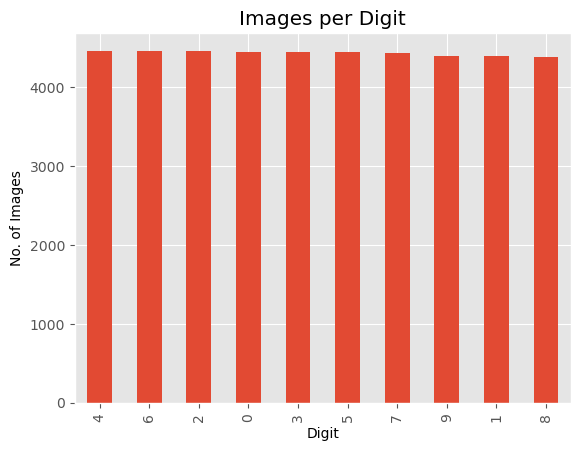

In [674]:
comp= ds['digit'].value_counts().head(10).plot(kind='bar', title= 'Images per Digit')

comp.set_xlabel('Digit')
comp.set_ylabel('No. of Images')

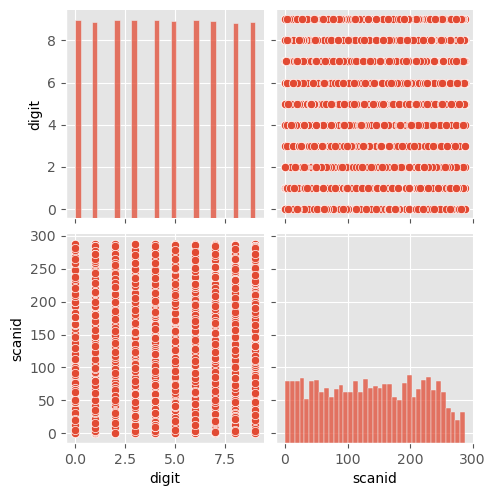

In [675]:
sns.pairplot(ds, vars=['digit', 'scanid'])
plt.show()

<Axes: >

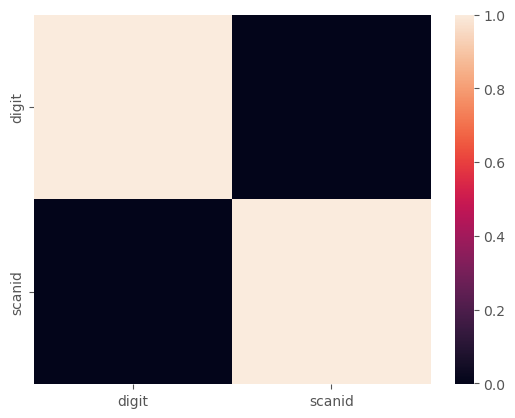

In [676]:
corr= ds[['digit', 'scanid']].corr()
sns.heatmap(corr)

In [677]:
ds=ds[['filename','digit','database name']]
ds#removing unecessary features

,filename,digit,database name
0,a00000.png,5,training-a
1,a00001.png,3,training-a
2,a00002.png,1,training-a
3,a00003.png,7,training-a
4,a00004.png,0,training-a
...,...,...,...
24293,c24293.png,3,training-c
24294,c24294.png,2,training-c
24295,c24295.png,7,training-c
24296,c24296.png,2,training-c


In [678]:
ds.shape

(44359, 3)

In [679]:
ds.isnull().sum()

filename         0
digit            0
database name    0
dtype: int64

In [680]:
ds['filename'].duplicated().any()

False

In [681]:
X=ds.drop('digit',axis=1).values
y=ds['digit'].values

In [682]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

In [683]:
dtb = {'training-a':0, 'training-b':0, 'training-c':0, }
digit = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

def dtb_distribution(split_name):
    count_a= 0
    count_b= 0
    count_c= 0
    
    for i in split_name:
        if i[1]=='training-a':
            count_a+=1
        elif i[1]=='training-b':
            count_b+=1
        elif i[1]=='training-c':
            count_c+=1

    
    dtb['training-a']=count_a
    dtb['training-b']=count_b
    dtb['training-c']=count_c

    
def digit_distribution(split_name):
    for x in range(0,10):
        digit[x]=0
    
    for i in split_name:
        digit[i]+=1 


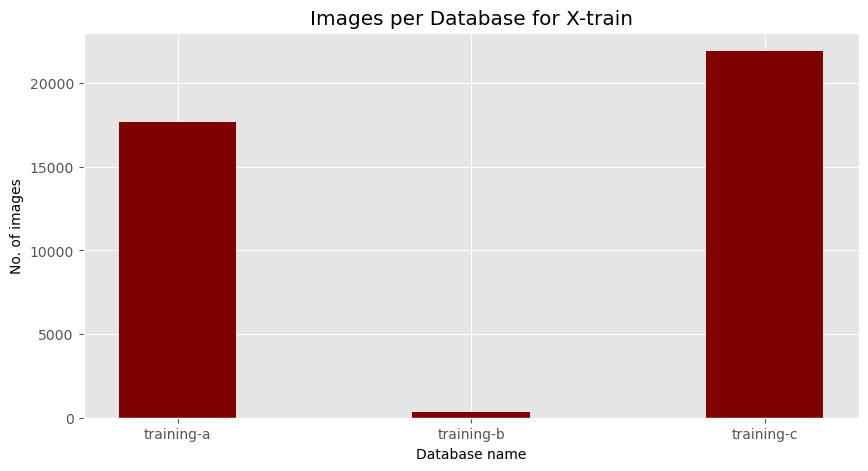

In [684]:
dtb_distribution(X_train)  
courses = list(dtb.keys())
values = list(dtb.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)

plt.xlabel("Database name")
plt.ylabel("No. of images")
plt.title("Images per Database for X-train")
plt.show()


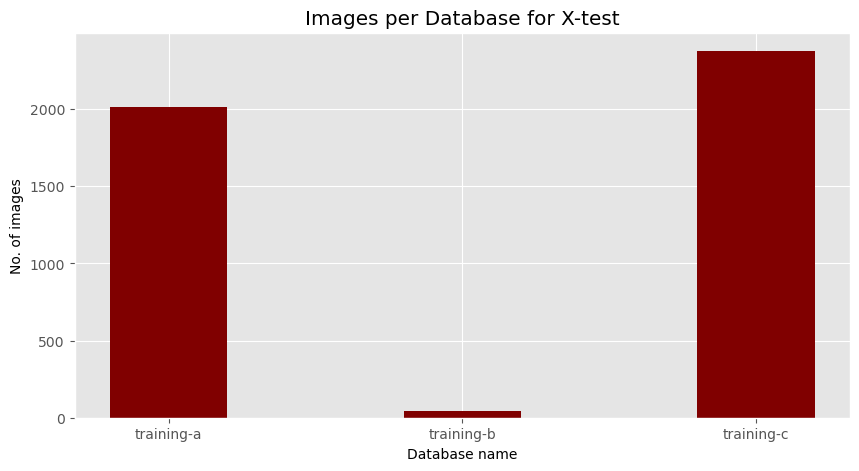

In [685]:
dtb_distribution(X_test)  
courses = list(dtb.keys())
values = list(dtb.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)

plt.xlabel("Database name")
plt.ylabel("No. of images")
plt.title("Images per Database for X-test")
plt.show()


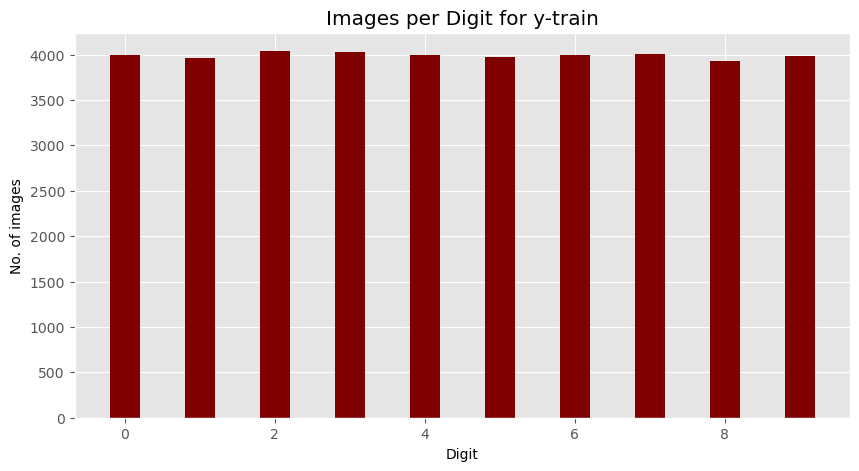

In [686]:
digit_distribution(y_train)  
courses = list(digit.keys())
values = list(digit.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)

plt.xlabel("Digit")
plt.ylabel("No. of images")
plt.title("Images per Digit for y-train")
plt.show()

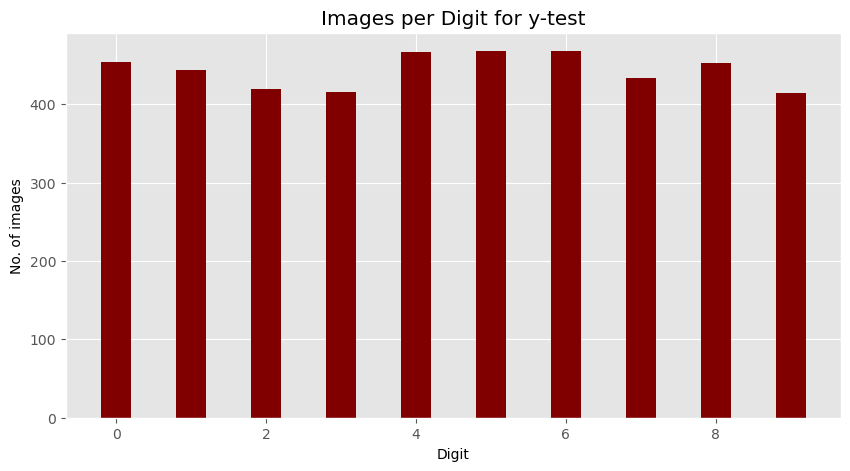

In [687]:
digit_distribution(y_test)  
courses = list(digit.keys())
values = list(digit.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)

plt.xlabel("Digit")
plt.ylabel("No. of images")
plt.title("Images per Digit for y-test")
plt.show()

In [688]:

X_train

array([['a11597.png', 'training-a'],
       ['a08252.png', 'training-a'],
       ['a14337.png', 'training-a'],
       ...,
       ['a12895.png', 'training-a'],
       ['a06012.png', 'training-a'],
       ['a06558.png', 'training-a']], dtype=object)

In [689]:
import numpy as np
IMG_SIZE = 28 
x_train_data = np.empty((len(X_train), IMG_SIZE, IMG_SIZE), dtype = np.int64)
x_test_data = np.empty((len(X_test), IMG_SIZE, IMG_SIZE), dtype = np.int64)
print(x_train_data.shape)

(39923, 28, 28)


In [690]:
def image(ds,ds2):
    
    path='E:\\Dataset\\jhgkjhg\\Numtadb\\'
    
    for i, path1 in enumerate(ds):
        img=cv.imread(path+path1[1]+'\\'+path1[0])
        img_resize=cv.resize(img, dsize=(28,28))
        img_gray = cv.cvtColor(img_resize, cv.COLOR_BGR2GRAY)
        ret, candidate_threshold = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
        ds2[i]=candidate_threshold

In [691]:
image(X_train,x_train_data)
image(X_test,x_test_data)

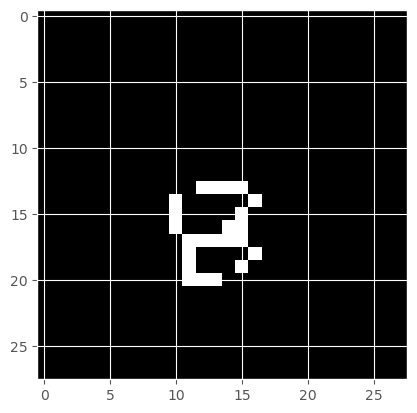

In [692]:
plt.imshow(x_train_data[1], cmap = "gray")

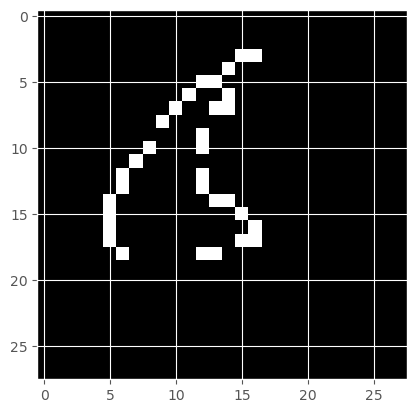

In [693]:
plt.imshow(x_train_data[10], cmap = "gray")


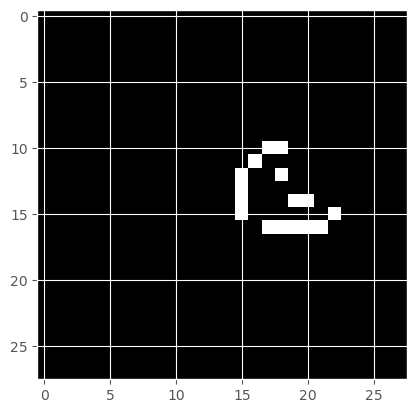

In [694]:
plt.imshow(x_train_data[100], cmap = "gray")

In [695]:
X_train = np.reshape(x_train_data, (X_train.shape[0], 28*28))
X_test = np.reshape(x_test_data, (X_test.shape[0], 28*28))

In [696]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [697]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(y_train.shape)

(39923, 10)


In [698]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.85, random_state = 45)

In [699]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(33934, 784) (4436, 784) (33934, 10) (4436,)


In [700]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

(33934, 28, 28, 1)
(4436, 28, 28, 1)


In [701]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    shear_range = 0.5,
    cval = 0.0,
    fill_mode = 'constant')

In [702]:
batch_size = 32
train_generator = datagen.flow(X_train, y_train, batch_size = batch_size, shuffle = False)

In [703]:
len(train_generator)


1061

In [704]:
# Training CNN Model

In [705]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters = 28, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(filters = 56, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(filters = 56, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.Flatten())
#cnn_model.add(layers.Dense(units = 56, activation = 'relu'))
#cnn_model.add(layers.Dense(units = 10, activation = 'softmax'))

cnn_model.summary()

C:\Users\atifr\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_158 (Conv2D)                  │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_91 (MaxPooling2D)      │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_159 (Conv2D)                  │ (None, 11, 11, 56)          │          14,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_92 (MaxPooling2D)      │ (None, 5, 5, 56)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_160 (Conv2D)                  │ (None, 3, 3, 56)            │          28,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_43 (Flatten)                 │ (None, 504)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,728 (166.91 KB)

 Trainable params: 42,728 (166.91 KB)

 Non-trainable params: 0 (0.00 B)

In [706]:
cnn_features_train = cnn_model.predict(X_train)
#cnn_features_val = cnn_model.predict(X_val)
cnn_features_test = cnn_model.predict(X_test)
cnn_features_train_reshaped = cnn_features_train.reshape(cnn_features_train.shape[0], -1)
cnn_features_test_reshaped = cnn_features_test.reshape(cnn_features_test.shape[0], -1)


1061/1061 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [707]:
y_train_class_labels = np.argmax(y_train, axis=1)

In [708]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(cnn_features_train_reshaped, y_train_class_labels)

LogisticRegression(max_iter=1000)

In [709]:
accuracy_train = logistic_regression_model.score(cnn_features_train_reshaped,y_train_class_labels )
accuracy_test = logistic_regression_model.score(cnn_features_test_reshaped, y_test)

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Training Accuracy: 0.7013614663759061
Test Accuracy: 0.6920649233543733


In [710]:
y_pred_lr = logistic_regression_model.predict(cnn_features_test_reshaped)
precision1 = precision_score(y_test, y_pred_lr, average='macro')
recall1 = recall_score(y_test, y_pred_lr, average='macro')
f1_1= f1_score(y_test, y_pred_lr, average='macro')

print("Logistic Regression:")
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_1)

Logistic Regression:
Training Accuracy: 0.7013614663759061
Test Accuracy: 0.6920649233543733
Precision: 0.6890069727569139
Recall: 0.6913510561828586
F1 Score: 0.6893267163906535


In [711]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)

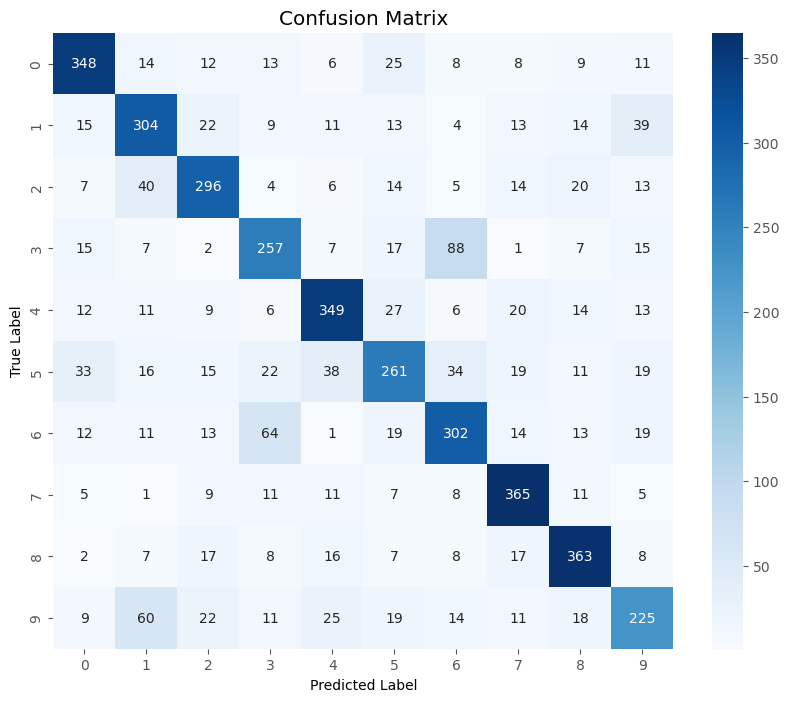

In [712]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [713]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(cnn_features_train_reshaped, y_train_class_labels)

RandomForestClassifier()

In [714]:
accuracy_train = random_forest_model.score(cnn_features_train_reshaped, y_train_class_labels)
accuracy_test1 = random_forest_model.score(cnn_features_test_reshaped, y_test)

In [715]:
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test1)

Training Accuracy: 1.0
Test Accuracy: 0.7069431920649234


In [716]:
y_pred_rf = random_forest_model.predict(cnn_features_test_reshaped)
precision2 = precision_score(y_test, y_pred_rf, average='macro')
recall2 = recall_score(y_test, y_pred_rf, average='macro')
f1_2 = f1_score(y_test, y_pred_rf, average='macro')


print("Random Forest:")
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test1)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_2)

Random Forest:
Training Accuracy: 1.0
Test Accuracy: 0.7069431920649234
Precision: 0.7048538395819812
Recall: 0.7070555999981264
F1 Score: 0.7046648800543444


In [717]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

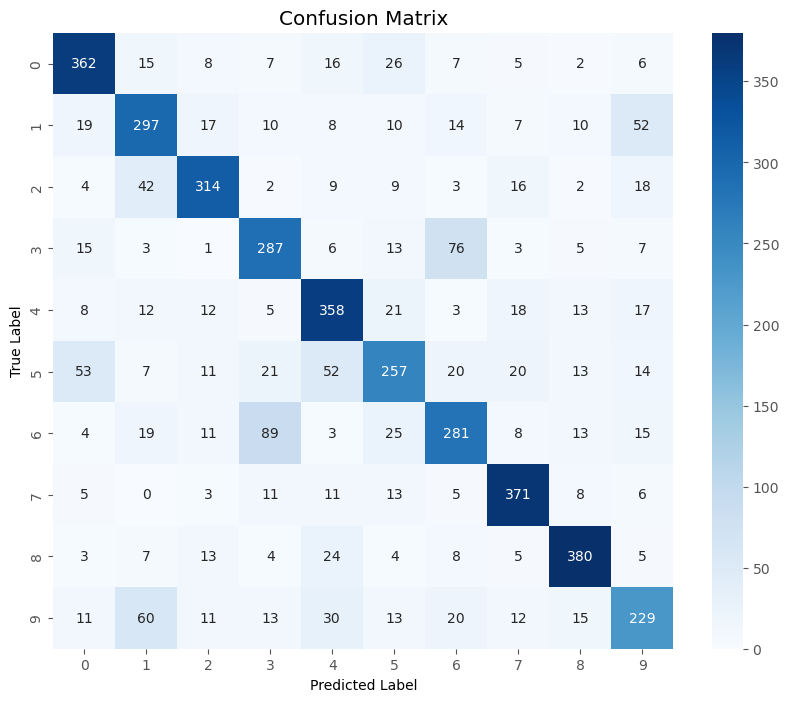

In [718]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [719]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters = 28, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(filters = 56, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(filters = 56, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.Flatten())
# cnn_model.add(layers.Dense(units = 56, activation = 'relu'))
cnn_model.add(layers.Dense(units = 10, activation = 'softmax'))

cnn_model.summary()

C:\Users\atifr\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_161 (Conv2D)                  │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_93 (MaxPooling2D)      │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_162 (Conv2D)                  │ (None, 11, 11, 56)          │          14,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_94 (MaxPooling2D)      │ (None, 5, 5, 56)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_163 (Conv2D)                  │ (None, 3, 3, 56)            │          28,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_44 (Flatten)                 │ (None, 504)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 10)                  │           5,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,778 (186.63 KB)

 Trainable params: 47,778 (186.63 KB)

 Non-trainable params: 0 (0.00 B)

In [720]:
cnn_features_test= cnn_model.predict(X_test)
epochs = 25
acc_callback = EarlyStopping(monitor = 'accuracy', verbose = 1, patience = 5, mode = 'max', restore_best_weights = True, start_from_epoch = 5)
loss_callback = EarlyStopping(monitor = 'loss', verbose = 1, patience = 5, mode = 'min', restore_best_weights = True, start_from_epoch = 5)

cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history  = cnn_model.fit(train_generator, epochs = epochs, callbacks = [acc_callback, loss_callback])

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/25
   6/1061 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1520 - loss: 2.2928

C:\Users\atifr\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1061/1061 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5376 - loss: 1.3406
Epoch 2/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8524 - loss: 0.4440
Epoch 3/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8840 - loss: 0.3480
Epoch 4/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9045 - loss: 0.2870
Epoch 5/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9133 - loss: 0.2570
Epoch 6/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9230 - loss: 0.2262
Epoch 7/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9261 - loss: 0.2122
Epoch 8/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9332 - loss: 0.1957
Epoch 9/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9365 - loss: 0.1876
Epoch 10/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9432 - loss: 0.1685
Epoch 11/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9426 - loss: 0.1672
Epoch 12/25
1061/10

In [721]:

y_test_one_hot = lb.transform(y_test)
history_test = cnn_model.evaluate(X_test, y_test_one_hot)

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9280 - loss: 0.2962


In [722]:
print("CNN Model - Test Loss:", history_test[0])
print("CNN Model - Test Accuracy:", history_test[1])

CNN Model - Test Loss: 0.2868592143058777
CNN Model - Test Accuracy: 0.9305680990219116


In [723]:
y_pred_prob = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
precision3 = precision_score(y_test, y_pred, average='macro')
recall3 = recall_score(y_test, y_pred, average='macro')
f1_3 = f1_score(y_test, y_pred, average='macro')

print("CNN Model - Test Loss:", history_test[0])
print("CNN Model - Test Accuracy:", history_test[1])
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f1_3)

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN Model - Test Loss: 0.2868592143058777
CNN Model - Test Accuracy: 0.9305680990219116
Precision: 0.9325728247133828
Recall: 0.9299850666706465
F1 Score: 0.9305763186193952


In [724]:
conf_matrix = confusion_matrix(y_test, y_pred)

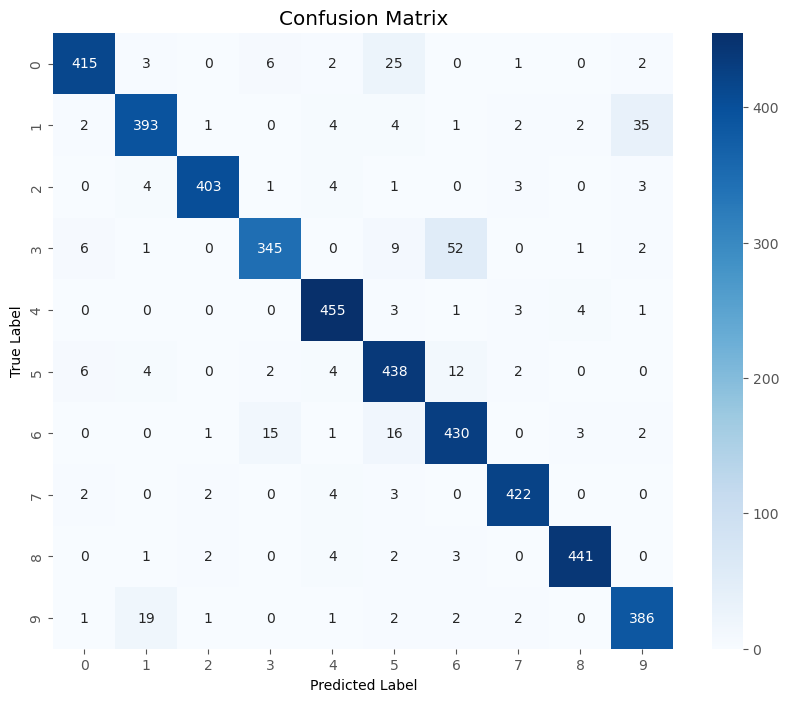

In [725]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [726]:
from tensorflow.keras import layers, models

cnn_model1 = models.Sequential()
cnn_model1.add(layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model1.add(layers.MaxPooling2D((2, 2)))
cnn_model1.add(layers.Dropout(0.25))
cnn_model1.add(layers.Conv2D(filters=56, kernel_size=(3, 3), activation='relu'))
cnn_model1.add(layers.MaxPooling2D((2, 2)))
cnn_model1.add(layers.Dropout(0.25))
cnn_model1.add(layers.Conv2D(filters=56, kernel_size=(3, 3), activation='relu'))
#cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model1.add(layers.Dropout(0.25))

cnn_model1.add(layers.Flatten())

cnn_model1.add(layers.Dense(units=10, activation='softmax'))

cnn_model1.summary()

C:\Users\atifr\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_164 (Conv2D)                  │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_95 (MaxPooling2D)      │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_165 (Conv2D)                  │ (None, 11, 11, 56)          │          14,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_96 (MaxPooling2D)      │ (None, 5, 5, 56)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 5, 5, 56)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_166 (Conv2D)                  │ (None, 3, 3, 56)            │          28,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_167 (Conv2D)                  │ (None, 1, 1, 64)            │          32,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_45 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,698 (295.70 KB)

 Trainable params: 75,698 (295.70 KB)

 Non-trainable params: 0 (0.00 B)

In [727]:
epochs = 25
acc_callback = EarlyStopping(monitor = 'accuracy', verbose = 1, patience = 5, mode = 'max', restore_best_weights = True, start_from_epoch = 5)
loss_callback = EarlyStopping(monitor = 'loss', verbose = 1, patience = 5, mode = 'min', restore_best_weights = True, start_from_epoch = 5)

cnn_model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history  = cnn_model1.fit(train_generator, epochs = epochs, callbacks = [acc_callback, loss_callback])

Epoch 1/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.4312 - loss: 1.5836
Epoch 2/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7837 - loss: 0.6330
Epoch 3/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8258 - loss: 0.5050
Epoch 4/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8571 - loss: 0.4238
Epoch 5/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8741 - loss: 0.3783
Epoch 6/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8786 - loss: 0.3583
Epoch 7/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8887 - loss: 0.3418
Epoch 8/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8924 - loss: 0.3250
Epoch 9/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8936 - loss: 0.3134
Epoch 10/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9029 - loss: 0.2960
Epoch 11/25
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8990 - loss: 0.2998
Epoch 12

In [728]:
history_test1 = cnn_model1.evaluate(X_test, y_test_one_hot)
print("CNN Model - Test Loss:", history_test1[0])
print("CNN Model - Test Accuracy:", history_test1[1])

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9446 - loss: 0.1873
CNN Model - Test Loss: 0.18886996805667877
CNN Model - Test Accuracy: 0.943417489528656


In [729]:
cnn_features_test1= cnn_model1.predict(X_test)
cnn_features_test1.shape

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(4436, 10)

In [730]:
pred = [cnn_features_test, cnn_features_test1]
ensemble_pred = np.mean(pred, axis=0)
ensemble_pred_labels = np.argmax(ensemble_pred, axis=1)


In [731]:
from sklearn.metrics import accuracy_score
ensemble_accuracy = accuracy_score(y_test, ensemble_pred_labels)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.9434174932371506


In [732]:
precision4 = precision_score(y_test, ensemble_pred_labels, average='macro')
recall4 = recall_score(y_test, ensemble_pred_labels, average='macro')
f1_4 = f1_score(y_test, ensemble_pred_labels, average='macro')

In [733]:
print("Ensemble Accuracy:", ensemble_accuracy)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f1_4)


Ensemble Accuracy: 0.9434174932371506
Precision: 0.9434269600148866
Recall: 0.9434417376235601
F1 Score: 0.9432883764084272


In [734]:
conf_matrix = confusion_matrix(y_test, ensemble_pred_labels)

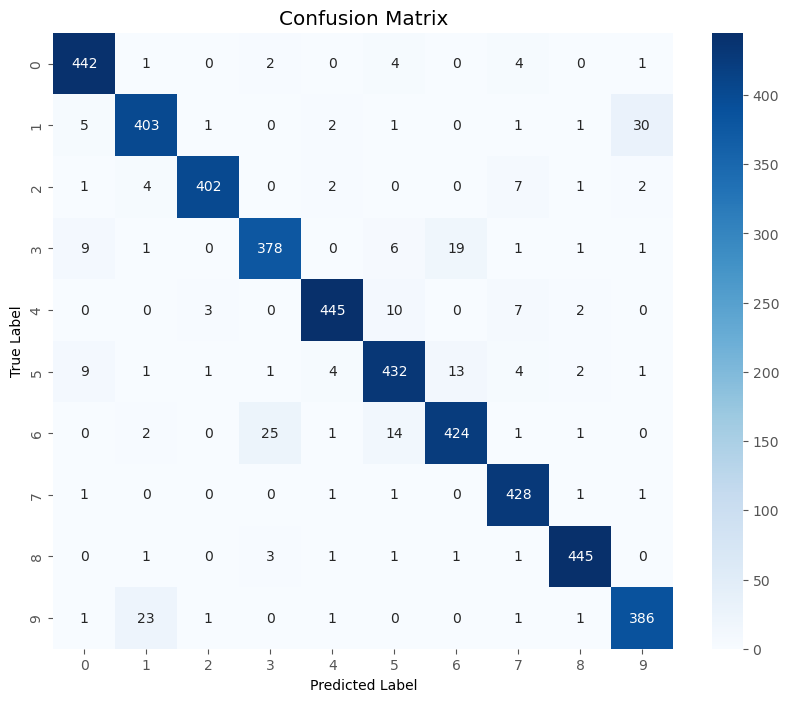

In [735]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [736]:
models = ['CNN+Logistic Regression', 'CNN+Random Forrest', 'CNN', 'CNN Ensembled']

pscores = [precision1, precision2, precision3, precision4]
rscores = [recall1, recall2, recall3, recall4]
f1scores = [f1_1, f1_2, f1_3, f1_4]
accuracy=[accuracy_test,accuracy_test1,history_test[1],ensemble_accuracy]

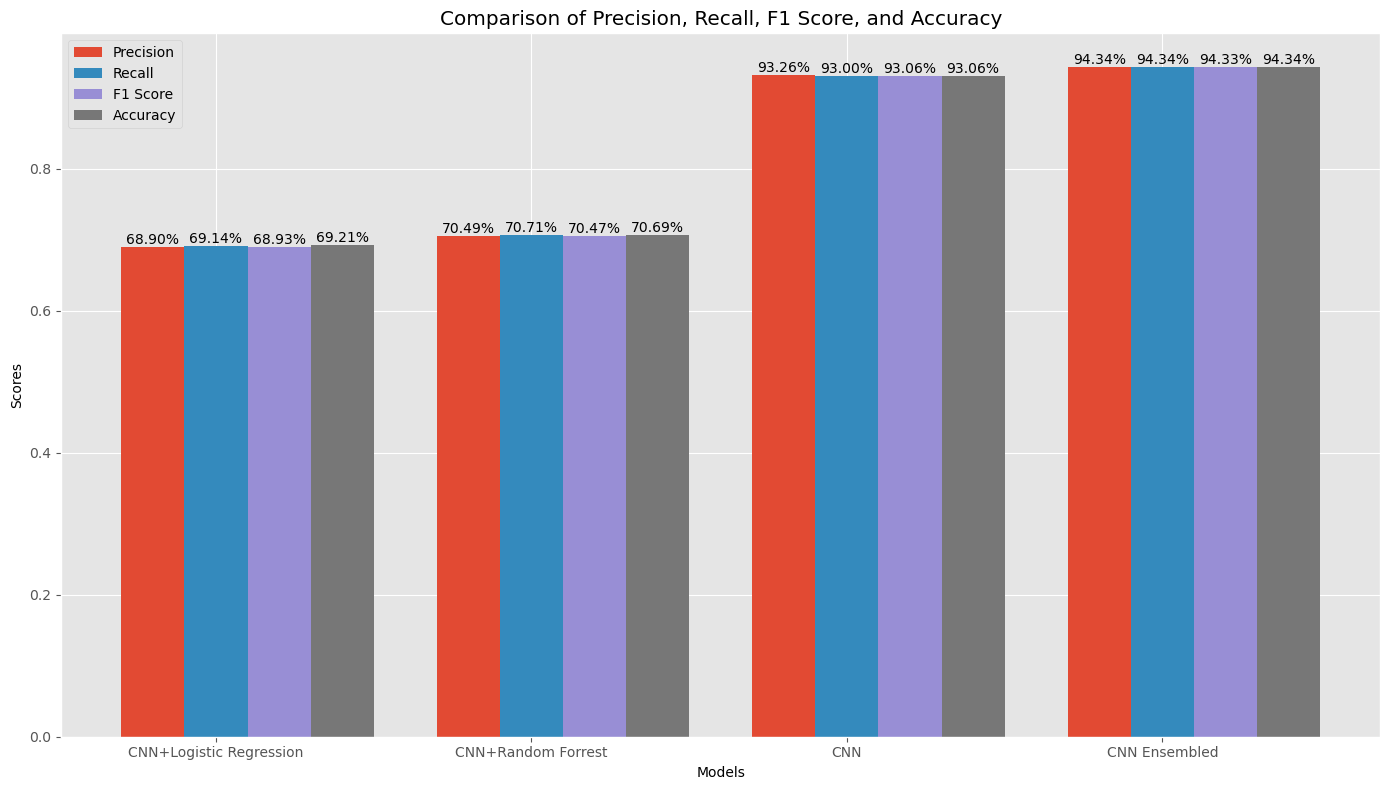

In [737]:
bar_width = 0.2
index = np.arange(len(models))
plt.figure(figsize=(14, 8))

b1=plt.bar(index - bar_width, pscores, width=bar_width, label='Precision')
b2=plt.bar(index, rscores, width=bar_width, label='Recall')
b3=plt.bar(index + bar_width, f1scores, width=bar_width, label='F1 Score')
b4=plt.bar(index + bar_width*2, accuracy, width=bar_width, label='Accuracy')
for i in [b1,b2,b3,b4]:
    for b in i:
        height=b.get_height()
        plt.text(b.get_x() + b.get_width() / 2, height, f'{(100*height):.2f}%', ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Precision, Recall, F1 Score, and Accuracy')
plt.xticks(index, models)
plt.legend()
plt.tight_layout()
plt.show()